In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, log_loss

In [127]:
# Cargar el dataset
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path)

In [128]:
# Imprimir la data
print("Datos Originales:")
print(data.head())

Datos Originales:
   39         State-gov   77516  Bachelors  13       Never-married  \
0  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
1  38           Private  215646    HS-grad   9            Divorced   
2  53           Private  234721       11th   7  Married-civ-spouse   
3  28           Private  338409  Bachelors  13  Married-civ-spouse   
4  37           Private  284582    Masters  14  Married-civ-spouse   

        Adm-clerical  Not-in-family  White    Male  2174  0  40  \
0    Exec-managerial        Husband  White    Male     0  0  13   
1  Handlers-cleaners  Not-in-family  White    Male     0  0  40   
2  Handlers-cleaners        Husband  Black    Male     0  0  40   
3     Prof-specialty           Wife  Black  Female     0  0  40   
4    Exec-managerial           Wife  White  Female     0  0  40   

   United-States  <=50K  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3           Cuba  <=50K  
4  United-States  <=50K  


In [129]:
# Renombrar las columnas para que sean más descriptivas
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [130]:
# Manejo de valores nulos (si hay)
data = data.dropna()

In [131]:
# Codificación de variables categóricas
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [132]:
# Separación de características (X) y objetivo (y)
X = data.drop('income', axis=1)
y = data['income']

In [133]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [134]:
# Entrenar el modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [135]:
# Evaluar el modelo
y_pred = nb_model.predict(X_test)


In [144]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.80017743806729
Confusion Matrix:
 [[10619   547]
 [ 2381  1106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     11166
           1       0.67      0.32      0.43      3487

    accuracy                           0.80     14653
   macro avg       0.74      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653



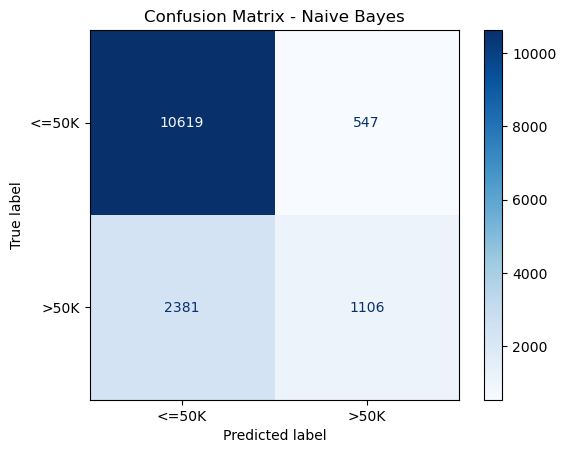

In [145]:
# Visualizar la matriz de confusión para Naive Bayes
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [147]:
# Evaluar en el conjunto de entrenamiento
y_train_pred = nb_model.predict(X_train)
y_train_proba = nb_model.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)

# Evaluar en el conjunto de prueba
y_test_pred = nb_model.predict(X_test)
y_test_proba = nb_model.predict_proba(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = log_loss(y_test, y_test_proba)

print(f'Training Loss: {train_loss}')
print(f'Validation Loss: {test_loss}')
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {test_accuracy}')

if train_loss > test_loss:
    print("Puede que haya un underfitting.")
elif train_loss < test_loss:
    print("Puede que haya un overfitting.")
else:
    print("El modelo está bien ajustado.")

Training Loss: 0.9251152058101031
Validation Loss: 0.8712961631390395
Training Accuracy: 0.7928805428805429
Validation Accuracy: 0.80017743806729
Puede que haya un underfitting.


Conclusion:
Al usar Bayes nos menciona un accuracy de 0.80 de prediccion en base a la probabilidad para conseguir un mejor entrenamiento se realizo un cambio de variables categoricas para facilitar el uso de las etiquetas a predecir por lo cual tambien nos menciona que existe underfitting por un lijero desajuste entre el entrenamiento y las pruebas que es lo que ayuda a determinar el resultado. 